In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

In [10]:
df = pd.read_csv("../summary_data/original/all_tools_TRB.csv")
T_cell_poor_monoclonal = pd.read_csv("../summary_data/subsample/T_cell_poor_monoclonal.csv")
df = pd.concat([df,T_cell_poor_monoclonal],ignore_index=True,sort=False)
df

,Sample,CDR3,nReads_TCR,nReads_MIXCR,nReads_IMREP,nReads_TRUST4,tissue,tissue_type,total_reads_TCR,total_reads_MIXCR,total_reads_IMREP,total_reads_TRUST4,frequency_TCR,frequency_MIXCR,frequency_IMREP,frequency_TRUST4,repertoire_type,class
0,MP-11-28-12RNA_S2,CASSVNPGGYNEQFF,6.0,0.0,0.0,0.0,PBMC,T_cell_rich,18617.0,55.0,111.0,186.0,0.000322,0.0,0.0,0.0,polyclonal,T_cell_rich_polyclonal
1,MP-11-28-12RNA_S2,CASIRTRNEKLFF,2.0,0.0,0.0,0.0,PBMC,T_cell_rich,18617.0,55.0,111.0,186.0,0.000107,0.0,0.0,0.0,polyclonal,T_cell_rich_polyclonal
2,MP-11-28-12RNA_S2,CASSPGAANTEAFF,2.0,0.0,0.0,0.0,PBMC,T_cell_rich,18617.0,55.0,111.0,186.0,0.000107,0.0,0.0,0.0,polyclonal,T_cell_rich_polyclonal
3,MP-11-28-12RNA_S2,CASRNQGLNTEAFF,2.0,0.0,0.0,0.0,PBMC,T_cell_rich,18617.0,55.0,111.0,186.0,0.000107,0.0,0.0,0.0,polyclonal,T_cell_rich_polyclonal
4,MP-11-28-12RNA_S2,CASSLTGNRAYNEQFF,2.0,0.0,0.0,0.0,PBMC,T_cell_rich,18617.0,55.0,111.0,186.0,0.000107,0.0,0.0,0.0,polyclonal,T_cell_rich_polyclonal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417895,insilco_sample3,CASSYAANTGELSF,NaN,0.0,0.0,0.0,NaN,T_cell_poor,NaN,261.0,261.0,261.0,0.000000,0.0,0.0,0.0,monoclonal,T_cell_poor_monoclonal
417896,insilco_sample3,CASSLTHNEQFF,NaN,0.0,0.0,0.0,NaN,T_cell_poor,NaN,261.0,261.0,261.0,0.000000,0.0,0.0,0.0,monoclonal,T_cell_poor_monoclonal
417897,insilco_sample3,CASPGGHSPLHF,NaN,0.0,0.0,0.0,NaN,T_cell_poor,NaN,261.0,261.0,261.0,0.000000,0.0,0.0,0.0,monoclonal,T_cell_poor_monoclonal
417898,insilco_sample3,CASIPKGGARPGEQFF,NaN,0.0,0.0,0.0,NaN,T_cell_poor,NaN,261.0,261.0,261.0,0.000000,0.0,0.0,0.0,monoclonal,T_cell_poor_monoclonal


Clonotype frequencies comparison in monoclonal and polyclonal repertoires

In [11]:
# MIXCR
MIXCR = df[['Sample','class','tissue','tissue_type','repertoire_type','CDR3','frequency_TCR','frequency_MIXCR']]
MIXCR = MIXCR.loc[(MIXCR['frequency_TCR'] != 0) & (MIXCR['frequency_MIXCR'] != 0)]
MIXCR = MIXCR.rename(columns = {'frequency_MIXCR':'frequency_tool'})
MIXCR['tool'] = 'MIXCR'

# IMREP
IMREP = df[['Sample','class','tissue','tissue_type','repertoire_type','CDR3','frequency_TCR','frequency_IMREP']]
IMREP = IMREP.loc[(IMREP['frequency_TCR'] != 0) & (IMREP['frequency_IMREP'] != 0)]
IMREP = IMREP.rename(columns = {'frequency_IMREP':'frequency_tool'})
IMREP['tool'] = 'IMREP'

# TRUST4
TRUST4 = df[['Sample','class','tissue','tissue_type','repertoire_type','CDR3','frequency_TCR','frequency_TRUST4']]
TRUST4 = TRUST4.loc[(TRUST4['frequency_TCR'] != 0) & (TRUST4['frequency_TRUST4'] != 0)]
TRUST4 = TRUST4.rename(columns = {'frequency_TRUST4':'frequency_tool'})
TRUST4['tool'] = 'TRUST4'

clonotype_frequency = pd.concat([MIXCR,IMREP,TRUST4])
clonotype_frequency['frequency_TCR'] = clonotype_frequency['frequency_TCR']
clonotype_frequency['frequency_tool'] = clonotype_frequency['frequency_tool']
clonotype_frequency

,Sample,class,tissue,tissue_type,repertoire_type,CDR3,frequency_TCR,frequency_tool,tool
415,MP-11-28-12RNA_S2,T_cell_rich_polyclonal,PBMC,T_cell_rich,polyclonal,CAIKEELGPGNEQFF,0.028952,0.145455,MIXCR
732,MP-11-28-12RNA_S2,T_cell_rich_polyclonal,PBMC,T_cell_rich,polyclonal,CASSLEQNTEAFF,0.000107,0.036364,MIXCR
3483,MP-11-28-12RNA_S2,T_cell_rich_polyclonal,PBMC,T_cell_rich,polyclonal,CAIIGAGPDTQYF,0.000107,0.054545,MIXCR
3505,MP-11-28-12RNA_S2,T_cell_rich_polyclonal,PBMC,T_cell_rich,polyclonal,CASSLNGGAGEQYF,0.000215,0.054545,MIXCR
4055,MP-11-28-12RNA_S2,T_cell_rich_polyclonal,PBMC,T_cell_rich,polyclonal,CASSPTGASPLHF,0.001182,0.036364,MIXCR
...,...,...,...,...,...,...,...,...,...
388859,TCGA-CZ-5985,T_cell_poor_polyclonal,kidney,T_cell_poor,polyclonal,CAARGINEQFF,0.006309,0.007092,TRUST4
391564,insilco_sample1,T_cell_poor_monoclonal,NaN,T_cell_poor,monoclonal,CASSYVGNTGELFF,0.903298,0.328413,TRUST4
398894,insilco_sample2,T_cell_poor_monoclonal,NaN,T_cell_poor,monoclonal,CASSYVGNTGELFF,0.911887,0.319838,TRUST4
409547,insilco_sample3,T_cell_poor_monoclonal,NaN,T_cell_poor,monoclonal,CASSPRGVGETQYF,0.005762,0.003831,TRUST4


Clonotype frequency comparison in T cell rich tissues

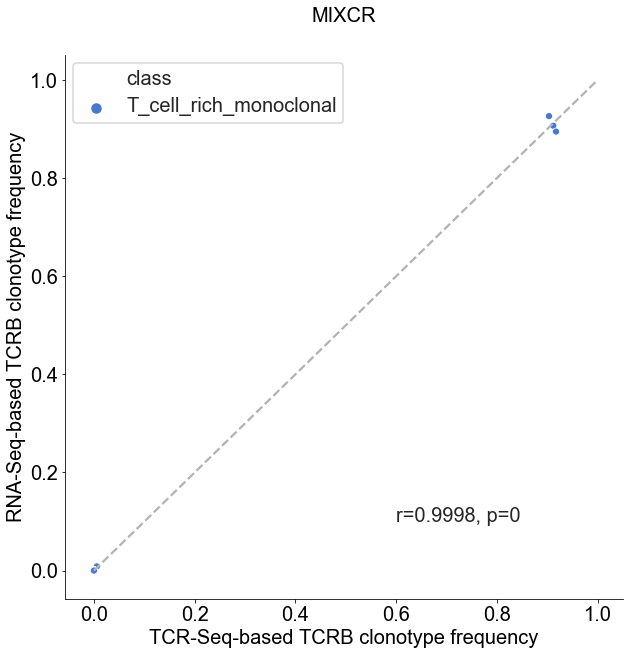

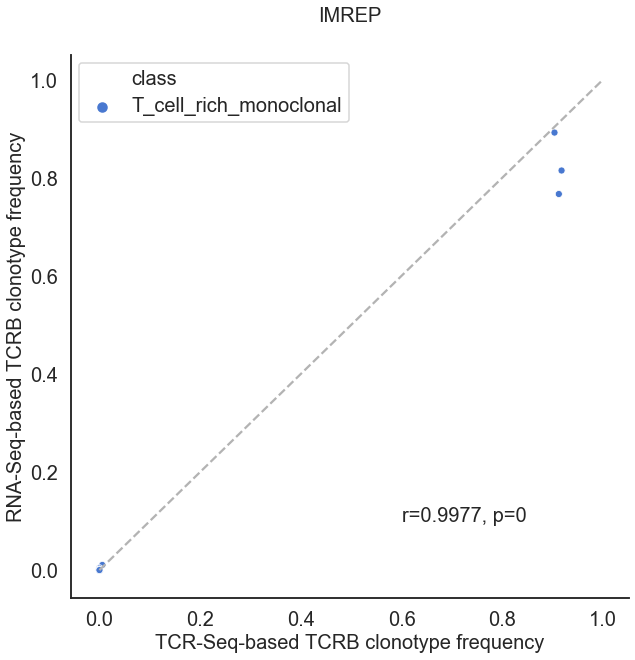

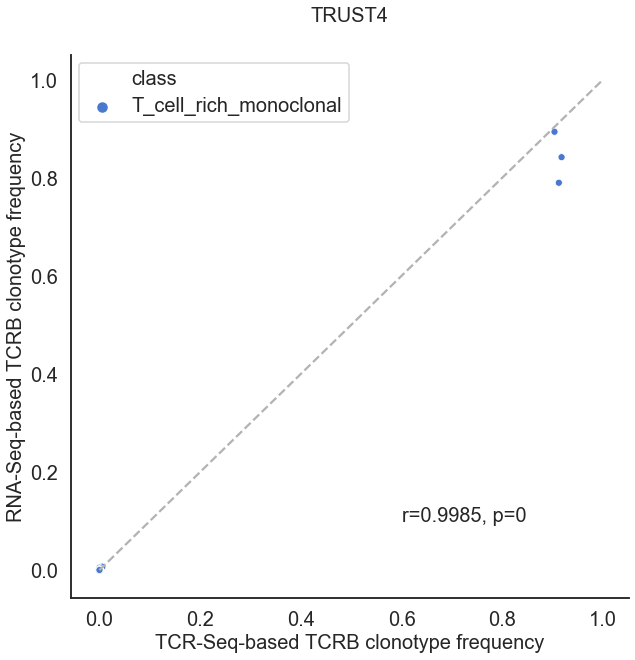

In [12]:
tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    T_cell_rich_monoclonal = clonotype_frequency.loc[(clonotype_frequency['class'] == 'T_cell_rich_monoclonal')]
    figure = T_cell_rich_monoclonal.loc[(T_cell_rich_monoclonal['tool'] == tool)]
    f, ax = plt.subplots(figsize=(10,10))
    g = sns.set_style("white") 
    g = sns.set_context("talk") 
    g = sns.scatterplot(x='frequency_TCR', y='frequency_tool', hue='class', s=50, data=figure, palette=['#4878d0'])
    g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
    g.lines[0].set_linestyle("--")
    
    g.axes.set_title(tool,fontsize=20,y=1.05)
    g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=20)
    g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)
    plt.setp(ax.get_legend().get_texts(), fontsize=20) 
    plt.setp(ax.get_legend().get_title(), fontsize=20)
    sns.despine()
 
    r, p = stats.pearsonr(figure['frequency_TCR'], figure['frequency_tool'])
    plt.text(0.6,0.1,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=20)

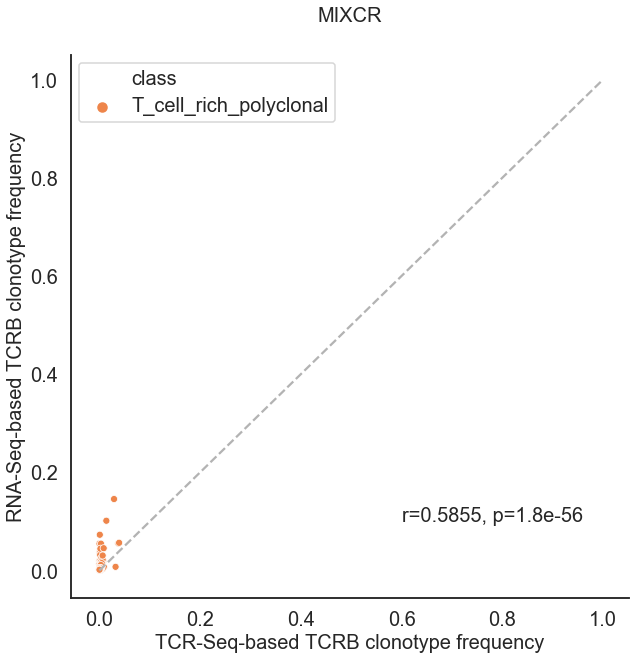

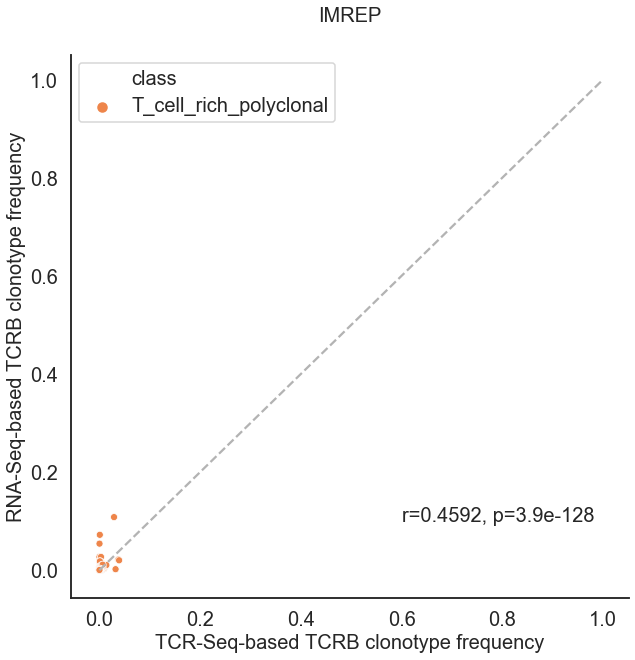

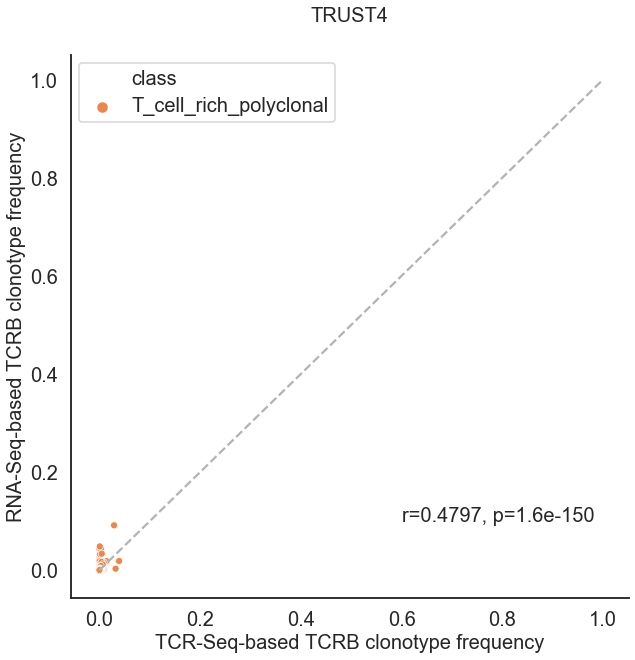

In [13]:
tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    T_cell_rich_polyclonal = clonotype_frequency.loc[(clonotype_frequency['class'] == 'T_cell_rich_polyclonal')]
    figure = T_cell_rich_polyclonal.loc[(T_cell_rich_polyclonal['tool'] == tool)]
    f, ax = plt.subplots(figsize=(10, 10))
    g = sns.set_style("white") 
    g = sns.set_context("talk") 
    g = sns.scatterplot(x='frequency_TCR', y='frequency_tool', hue='class', s=50, data=figure, palette=['#ee854a'])
    g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
    g.lines[0].set_linestyle("--")
    
    g.axes.set_title(tool,fontsize=20,y=1.05)
    g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=20)
    g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)
    plt.setp(ax.get_legend().get_texts(), fontsize=20) 
    plt.setp(ax.get_legend().get_title(), fontsize=20)
    sns.despine()
 
    r, p = stats.pearsonr(figure['frequency_TCR'], figure['frequency_tool'])
    plt.text(0.6,0.1,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=20)

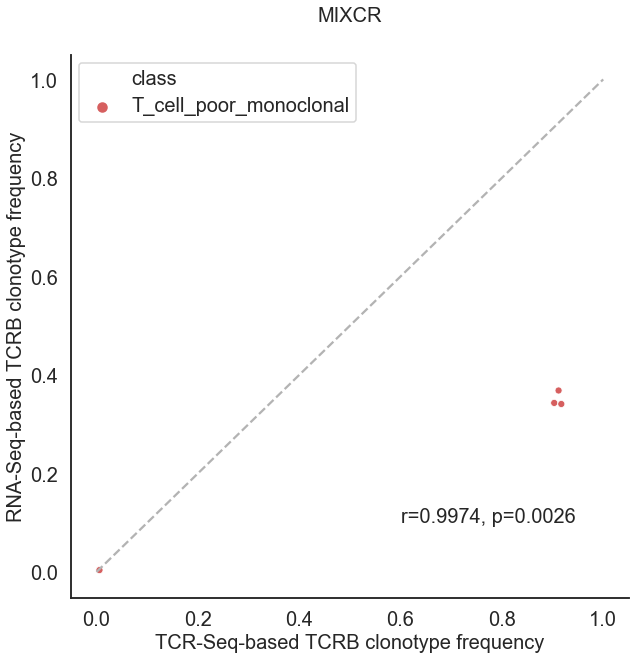

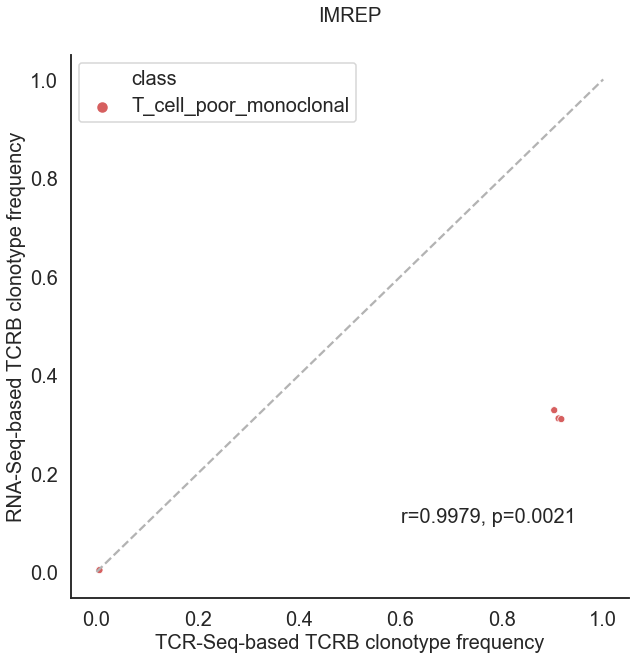

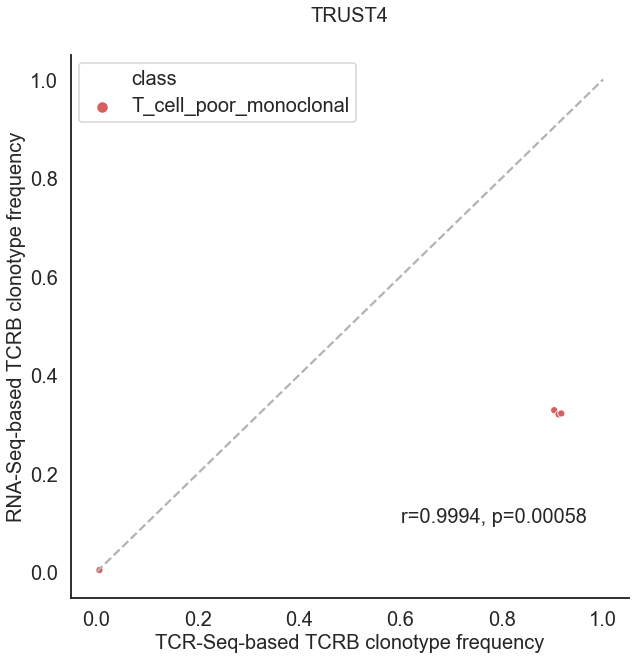

In [16]:
tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    T_cell_poor_monoclonal = clonotype_frequency.loc[(clonotype_frequency['class'] == 'T_cell_poor_monoclonal')]
    figure = T_cell_poor_monoclonal.loc[(T_cell_poor_monoclonal['tool'] == tool)]
    f, ax = plt.subplots(figsize=(10, 10))
    g = sns.set_style("white") 
    g = sns.set_context("talk") 
    g = sns.scatterplot(x='frequency_TCR', y='frequency_tool', hue='class', s=50, data=figure, palette=['#d65f5f'])
    g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
    g.lines[0].set_linestyle("--")
    
    g.axes.set_title(tool,fontsize=20,y=1.05)
    g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=20)
    g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)
    plt.setp(ax.get_legend().get_texts(), fontsize=20) 
    plt.setp(ax.get_legend().get_title(), fontsize=20)
    sns.despine()
 
    r, p = stats.pearsonr(figure['frequency_TCR'], figure['frequency_tool'])
    plt.text(0.6,0.1,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=20)

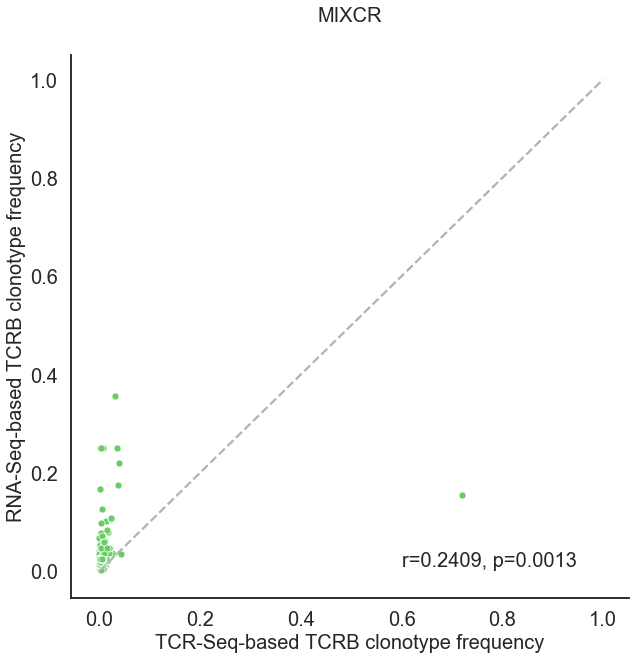

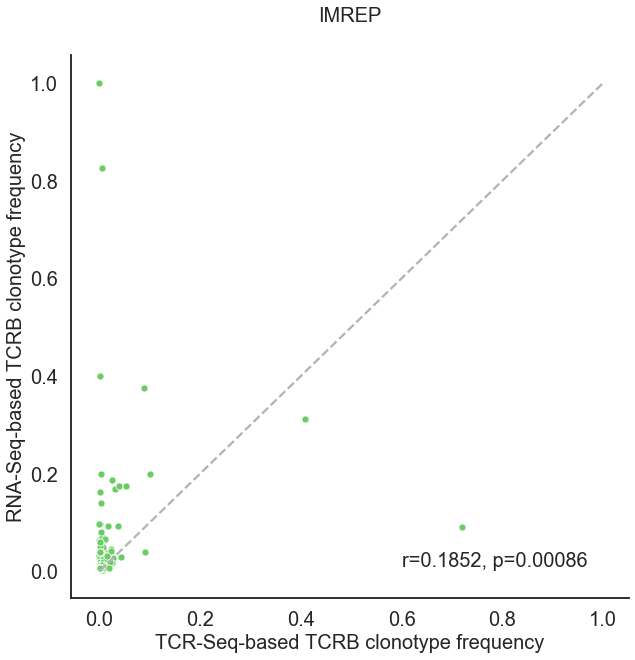

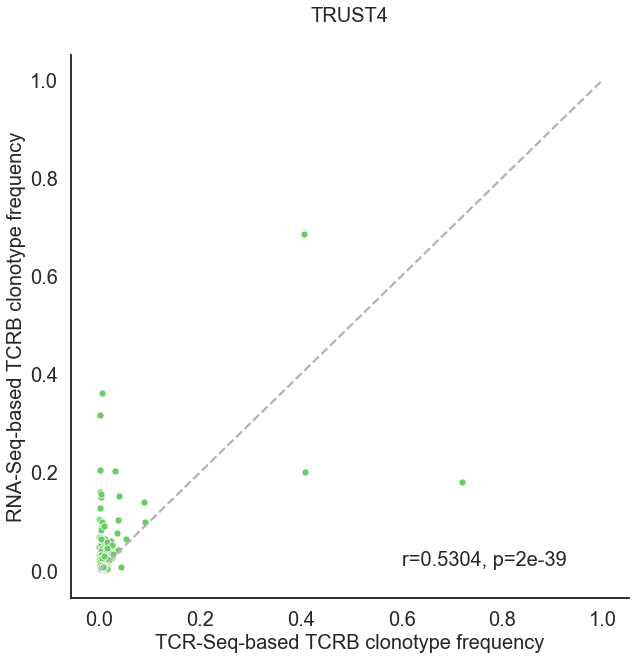

In [17]:
T_cell_poor_polyclonal = clonotype_frequency.loc[(clonotype_frequency['class'] == 'T_cell_poor_polyclonal')]
tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    figure = T_cell_poor_polyclonal.loc[(T_cell_poor_polyclonal['tool'] == tool)]
    f, ax = plt.subplots(figsize=(10, 10))
    g = sns.set_style("white") 
    g = sns.set_context("talk") 
    g = sns.scatterplot(x='frequency_TCR', y='frequency_tool', s=50, data=figure, color=['#6acc64'])
    g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
    g.lines[0].set_linestyle("--")
    
    g.axes.set_title(tool,fontsize=20,y=1.05)
    g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=20)
    g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)
    sns.despine()
 
    r, p = stats.pearsonr(figure['frequency_TCR'], figure['frequency_tool'])
    plt.text(0.6,0.01,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=20)

In [42]:
# Calculate the Pearson correlation for T_cell_rich monoclonal repertoires
T_cell_rich_monoclonal = clonotype_frequency.loc[(clonotype_frequency['class'] == 'T_cell_rich_monoclonal')]

tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    correlation = T_cell_rich_monoclonal.loc[(T_cell_rich_monoclonal['tool'] == tool)]
    print(tool + ' Pearson correlation coefficient:' + str(stats.pearsonr(correlation['frequency_TCR'], correlation['frequency_tool'])))

MIXCR Pearson correlation coefficient:(0.99978374776631, 0.0)
IMREP Pearson correlation coefficient:(0.9977249763700023, 0.0)
TRUST4 Pearson correlation coefficient:(0.9984995931162889, 0.0)


In [43]:
# Calculate the Pearson correlation for T_cell_rich polyclonal repertoires
T_cell_rich_polyclonal = clonotype_frequency.loc[(clonotype_frequency['class'] == 'T_cell_rich_polyclonal')]

tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    correlation = T_cell_rich_polyclonal.loc[(T_cell_rich_polyclonal['tool'] == tool)]
    print(tool + ' Pearson correlation coefficient:' + str(stats.pearsonr(correlation['frequency_TCR'], correlation['frequency_tool'])))

MIXCR Pearson correlation coefficient:(0.5854538156625534, 1.7569805469106419e-56)
IMREP Pearson correlation coefficient:(0.45923192595267337, 3.8633598206394555e-128)
TRUST4 Pearson correlation coefficient:(0.47974202693335954, 1.6343249014226752e-150)


In [44]:
# Calculate the Pearson correlation for T_cell_poor polyclonal repertoires
T_cell_poor_polyclonal = clonotype_frequency.loc[(clonotype_frequency['class'] == 'T_cell_poor_polyclonal')]

tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    correlation = T_cell_poor_polyclonal.loc[(T_cell_poor_polyclonal['tool'] == tool)]
    print(tool + ' Pearson correlation coefficient:' + str(stats.pearsonr(correlation['frequency_TCR'], correlation['frequency_tool'])))

MIXCR Pearson correlation coefficient:(0.24091035765076801, 0.0012781757426747827)
IMREP Pearson correlation coefficient:(0.18520380380710913, 0.0008556235517235162)
TRUST4 Pearson correlation coefficient:(0.5303561544237657, 2.0256573756732397e-39)


In [27]:
# minor_clonotypes = clonotype_frequency.loc[clonotype_frequency['frequency_TCR'] <= 0.1]
# minor_clonotypes

In [28]:
# tools = ['MIXCR','IMREP','TRUST4'] 
# for tool in tools: 
#     figure_minor_clonotype_frequency = minor_clonotypes.loc[(minor_clonotypes['tool'] == tool)]
#     g = sns.set_style("white")
#     g = sns.set_context("talk")
#     g = sns.lmplot(data=figure_minor_clonotype_frequency,x="frequency_TCR",y="frequency_tool",hue="class",ci=None,scatter_kws={"s":5},
#                    hue_order=['T_cell_rich_monoclonal','T_cell_rich_polyclonal'],height=7,palette="muted")
#     g.set_axis_labels("TCR-Seq-based TCRB clonotype frequency","RNA-Seq-based TCRB clonotype frequency")
#     g.fig.suptitle(tool)
#     g.set(ylim=(0,0.1))
#     g.set(xlim=(0,0.1))

In [29]:
# # Calculate the Pearson correlation for T_cell_rich monoclonal repertoires
# T_cell_rich_monoclonal_minor = minor_clonotypes.loc[(minor_clonotypes['class'] == 'T_cell_rich_monoclonal')]

# tools = ['MIXCR','IMREP','TRUST4']              
# for tool in tools: 
#     correlation = T_cell_rich_monoclonal_minor.loc[(T_cell_rich_monoclonal_minor['tool'] == tool)]
#     print(tool + ' Pearson correlation coefficient:' + str(stats.pearsonr(correlation['frequency_TCR'], correlation['frequency_tool'])))

In [30]:
# # Calculate the Pearson correlation for T_cell_rich polyclonal repertoires
# T_cell_rich_polyclonal_minor = minor_clonotypes.loc[(minor_clonotypes['class'] == 'T_cell_rich_polyclonal')]

# tools = ['MIXCR','IMREP','TRUST4']              
# for tool in tools: 
#     correlation = T_cell_rich_polyclonal_minor.loc[(T_cell_rich_polyclonal_minor['tool'] == tool)]
#     print(tool + ' Pearson correlation coefficient:' + str(stats.pearsonr(correlation['frequency_TCR'], correlation['frequency_tool'])))

In [31]:
# # Calculate the Pearson correlation for T_cell_poor polyclonal repertoires
# T_cell_poor_polyclonal_minor = minor_clonotypes.loc[(minor_clonotypes['class'] == 'T_cell_poor_polyclonal')]

# tools = ['MIXCR','IMREP','TRUST4']              
# for tool in tools: 
#     correlation = T_cell_poor_polyclonal_minor.loc[(T_cell_poor_polyclonal_minor['tool'] == tool)]
#     print(tool + ' Pearson correlation coefficient:' + str(stats.pearsonr(correlation['frequency_TCR'], correlation['frequency_tool'])))

In [13]:
#tools = ['MIXCR','IMREP','TRUST4']    
#marker_list = ['X', 'o']

#for tool in tools: 
    #figure_clonotype_frequency = clonotype_frequency.loc[(clonotype_frequency['tool'] == tool)]
    #g = sns.set_style("white") 
    #g = sns.set_context("paper")  
    #g = sns.jointplot(data=figure_clonotype_frequency, x="frequency_TCR", y="frequency_tool",kind="reg",scatter = False)
    #sns.scatterplot(data=figure_clonotype_frequency,x="frequency_TCR", y="frequency_tool",hue="repertoire_type",style='tissue_type',s=30,markers=marker_list)
    #g.annotate(stats.pearsonr)
    #g.fig.suptitle(tool)
    #g.set_axis_labels('x', 'y', fontsize=12)
    #g.ax_joint.set_xlabel('TCR-Seq-based TCRB clonotype frequency')
    #g.ax_joint.set_ylabel('RNA-Seq-based TCRB clonotype frequency')

In [10]:
# tools = ['MIXCR','IMREP','TRUST4'] 
# for tool in tools: 
#     figure_clonotype_frequency = clonotype_frequency.loc[(clonotype_frequency['tool'] == tool)]
#     g = sns.set_style("white")
#     g = sns.set_context("talk")
#     g = sns.lmplot(data=figure_clonotype_frequency,x="frequency_TCR",y="frequency_tool",hue="class",ci=None,scatter_kws={"s": 10},palette="muted",hue_order=['T_cell_rich_monoclonal','T_cell_rich_polyclonal'],height=7)
#     g.set_axis_labels("TCR-Seq-based TCRB clonotype frequency","RNA-Seq-based TCRB clonotype frequency")
#     g.fig.suptitle(tool)
#     g.set(ylim=(0, 1))
#     g.set(xlim=(0, 1))